In [668]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [669]:
!nvidia-smi

Sat Dec  2 02:49:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [670]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [671]:
# create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the picture) -->
  #Hidden Layer1 (number of neurons) -->
  #H2 (n)-->
  #output (3 classes of iris flowers)
  def __init__(self, in_features=3, h1=8, h2=9, out_features=2):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # pushing it forward layers by layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) # push it to the first layers
    x = F.relu(self.fc2(x)) # push it to the second layers
    x = self.out(x) # push it to the last layer

    return x

In [672]:
#pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [673]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [674]:
# upload the dataset from anywhere
url = '/content/drive/MyDrive/images/train_labels.csv'
my_df = pd.read_csv(url)

In [675]:
# load the dataset
my_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,10232308_015_5205.jpg,159,183,vagina,48,31,114,175
1,11458736_011_9968.jpg,172,279,vagina,54,33,128,246
2,11467216_007_3eb2.jpg,226,141,breast,4,30,216,130
3,11511711_007_f8ce.jpg,168,297,vagina,38,18,145,220
4,11657390_004_0397.jpg,389,236,vagina,160,67,254,217
...,...,...,...,...,...,...,...,...
268,99594086_001_9509.jpg,460,301,breast,292,119,327,136
269,b11786a61a3e6a70734b5867df5e060e.30.jpg,352,198,penis,152,125,213,194
270,b11786a61a3e6a70734b5867df5e060e.30.jpg,352,198,vagina,165,101,209,132
271,mouth and penis.jpg,147,165,penis,31,26,119,156


In [676]:
# changing the names to numbers or change last column to numbers

my_df['class'] = my_df['class'].replace('vagina', 0.0)
my_df['class'] = my_df['class'].replace('breast', 1.0)
my_df['class'] = my_df['class'].replace('penis', 2.0)  # Corrected typo in 'Virginica'
# Set the entire 'filename' column to 1
my_df['filename'] = 1.0
my_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1.0,159,183,0.0,48,31,114,175
1,1.0,172,279,0.0,54,33,128,246
2,1.0,226,141,1.0,4,30,216,130
3,1.0,168,297,0.0,38,18,145,220
4,1.0,389,236,0.0,160,67,254,217
...,...,...,...,...,...,...,...,...
268,1.0,460,301,1.0,292,119,327,136
269,1.0,352,198,2.0,152,125,213,194
270,1.0,352,198,0.0,165,101,209,132
271,1.0,147,165,2.0,31,26,119,156


In [677]:
# Train Test Split! Set X, Y
X = my_df.drop('class', axis=1)
y = my_df['class']

In [678]:
X

,filename,width,height,xmin,ymin,xmax,ymax
0,1.0,159,183,48,31,114,175
1,1.0,172,279,54,33,128,246
2,1.0,226,141,4,30,216,130
3,1.0,168,297,38,18,145,220
4,1.0,389,236,160,67,254,217
...,...,...,...,...,...,...,...
268,1.0,460,301,292,119,327,136
269,1.0,352,198,152,125,213,194
270,1.0,352,198,165,101,209,132
271,1.0,147,165,31,26,119,156


In [679]:
y

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
268    1.0
269    2.0
270    0.0
271    2.0
272    2.0
Name: class, Length: 273, dtype: float64

In [680]:
 # Convert these to numpy arrays
X = X.values
y = y.values

In [681]:
X

array([[  1., 159., 183., ...,  31., 114., 175.],
       [  1., 172., 279., ...,  33., 128., 246.],
       [  1., 226., 141., ...,  30., 216., 130.],
       ...,
       [  1., 352., 198., ..., 101., 209., 132.],
       [  1., 147., 165., ...,  26., 119., 156.],
       [  1., 464., 736., ...,   4., 456., 729.]])

In [682]:
y

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2., 2., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 1., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 0., 0., 1., 2., 1., 0.,
       1., 1., 0., 1., 1., 2., 2., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [683]:
from sklearn.model_selection import train_test_split

In [684]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [685]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [686]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [687]:
y_test

tensor([0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
        0, 0, 2, 0, 2, 2, 2])

In [688]:
y_train

tensor([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
        0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2,
        2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2,
        0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
        2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
        1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
        1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2,
        1, 2])

In [689]:
# Create an instance of model with h1=7
model = Model(in_features=X_train.shape[1], h1=8, h2=9, out_features=3)

# Set the critierion of model to measure the error, how far off the predicitions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, learning rate (if error doesn't go down after a bunch of iterations(epochs), lower our learning variable)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [690]:
# Print the parameters of each layer
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

fc1.weight: torch.Size([8, 7])
fc1.bias: torch.Size([8])
fc2.weight: torch.Size([9, 8])
fc2.bias: torch.Size([9])
out.weight: torch.Size([3, 9])
out.bias: torch.Size([3])


In [691]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=7, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [692]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 10000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measures the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the networks to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 65.17748260498047
Epoch: 10 and loss: 8.73145866394043
Epoch: 20 and loss: 2.300978422164917
Epoch: 30 and loss: 1.3483822345733643
Epoch: 40 and loss: 0.9863497018814087
Epoch: 50 and loss: 0.8649864792823792
Epoch: 60 and loss: 0.7700496315956116
Epoch: 70 and loss: 0.7293148040771484
Epoch: 80 and loss: 0.702487587928772
Epoch: 90 and loss: 0.6827160120010376
Epoch: 100 and loss: 0.6667383909225464
Epoch: 110 and loss: 0.6534230709075928
Epoch: 120 and loss: 0.6414201855659485
Epoch: 130 and loss: 0.6315049529075623
Epoch: 140 and loss: 0.6227178573608398
Epoch: 150 and loss: 0.6138689517974854
Epoch: 160 and loss: 0.605198860168457
Epoch: 170 and loss: 0.5972780585289001
Epoch: 180 and loss: 0.5895115733146667
Epoch: 190 and loss: 0.5819284915924072
Epoch: 200 and loss: 0.5739814043045044
Epoch: 210 and loss: 0.5626968741416931
Epoch: 220 and loss: 0.5523162484169006
Epoch: 230 and loss: 0.5416618585586548
Epoch: 240 and loss: 0.5313150882720947
Epoch: 250 and lo

Text(0.5, 0, 'Epoch')

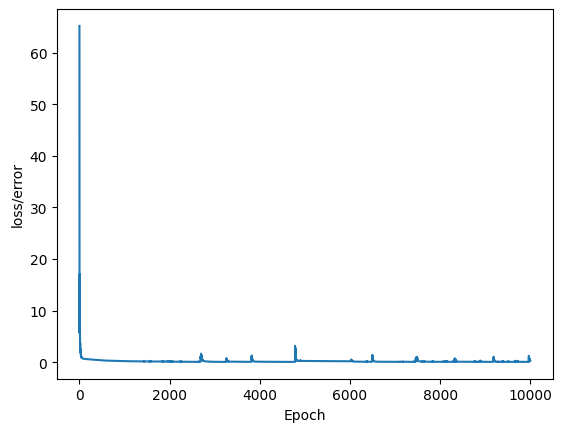

In [693]:
#Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [694]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are feature from our test set, y_eval will be propogation
  loss = criterion(y_eval, y_test) # Find the loss or error

In [695]:
loss

tensor(1.3491)

In [696]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] ==0:
      x = "vagina"
    elif y_test[i] == 1:
      x = 'breast'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}. {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

  print(f'We got {correct} correct!')

1. tensor([-1.5010, -2.6514, -5.1105]) 	 vagina 	 0
2. tensor([-21.7728, -22.8422,   2.5684]) 	 vagina 	 2
3. tensor([ -2.6944, -13.7572,   2.8498]) 	 vagina 	 2
4. tensor([-158.9098,   29.3196,   25.0487]) 	 breast 	 1
5. tensor([-22.6644, -23.7302,   2.9062]) 	 breast 	 2
6. tensor([ 3.9435,  2.7715, -7.1730]) 	 vagina 	 0
7. tensor([-79.1480,  12.5973,  11.5223]) 	 breast 	 1
8. tensor([-10.1744, -11.2901,  -1.8251]) 	 breast 	 2
9. tensor([-506.5622,   42.7198,  110.5072]) 	 breast 	 2
10. tensor([ -5.4496, -26.2351,  11.2628]) 	 breast 	 2
11. tensor([-6.4526, -7.5831, -3.2349]) 	 breast 	 2
12. tensor([-11.5571,   8.4371,  -4.2144]) 	 breast 	 1
13. tensor([-160.8747,   27.0567,   29.2485]) 	 breast 	 2
14. tensor([-0.8154, -1.9684, -5.3703]) 	 breast 	 0
15. tensor([ 3.8904,  2.7186, -7.1528]) 	 vagina 	 0
16. tensor([-71.6042,  13.3030,   9.6044]) 	 breast 	 1
17. tensor([-56.3537,   9.7923,   6.4088]) 	 breast 	 1
18. tensor([-16.0540, -17.1463,   0.4022]) 	 breast 	 2
19. ten

In [697]:
# SAVE OUR MODEL
torch.save(model.state_dict(), 'model_trained.h5') # save the file in another file (.pt, .pd etc)

In [701]:
# LOAD THE SAVED MODEL
new_model = Model(in_features=X_train.shape[1], h1=8, h2=9, out_features=3)
new_model.load_state_dict(torch.load('model_trained.h5'))


<All keys matched successfully>

In [702]:
# Set the model to evaluation mode (if needed)
new_model.eval()

Model(
  (fc1): Linear(in_features=7, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [708]:
# Create a zip file
zip_file_path = '/content/model_trained.h5.zip'
!zip -r "/content/model_trained.h5.zip" "/content/model_trained.h5"

updating: content/model_trained.h5 (deflated 47%)


In [707]:
# Download the zip file
from google.colab import files
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>